In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [3]:
from google.colab import files
uploaded = files.upload()
import io

data = pd.read_csv(io.StringIO(uploaded['interest_prediction_bank.csv'].decode('utf-8')))
data.head()

Saving interest_prediction_bank.csv to interest_prediction_bank (4).csv


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
data.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,NNVBBKZB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [5]:
for i in data[['ID', 'Region_Code']]:
    data.drop(i,axis=1,inplace=True)

In [6]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_interested              0
dtype: int64

In [7]:
 mode = data['Credit_Product'].mode()[0]
 data['Credit_Product'].fillna(mode, inplace=True)

In [9]:
df_corr = data.corr()
df = pd.DataFrame(df_corr['Is_interested'])
df

<ipython-input-9-72698a67e907>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = data.corr()


,Is_interested
Age,0.230814
Vintage,0.279642
Avg_Account_Balance,0.053370
Is_interested,1.000000


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Age', 'Vintage', 'Avg_Account_Balance']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,6.386088,Age
1,5.027854,Vintage
2,2.598217,Avg_Account_Balance


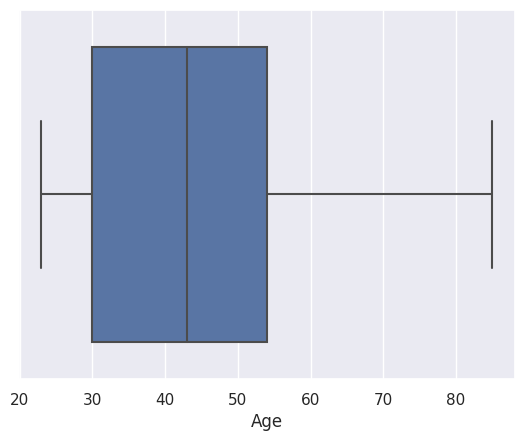

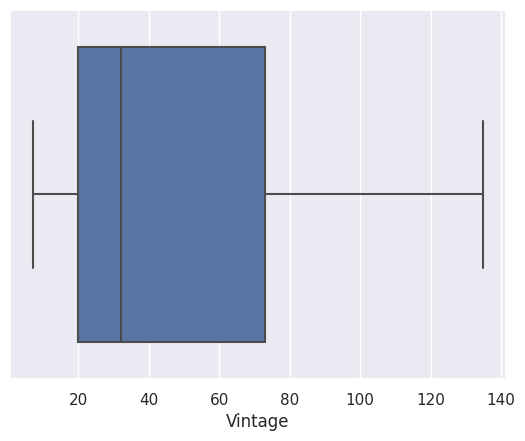

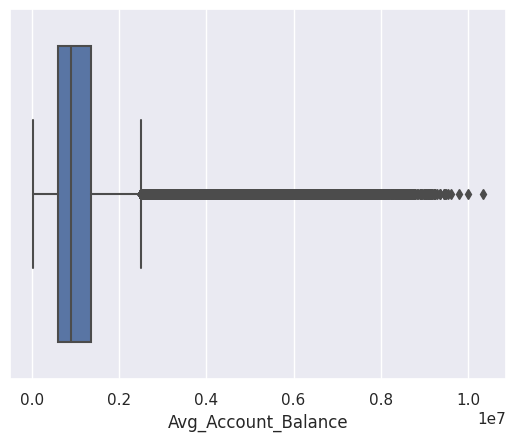

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

for i in data[['Age', 'Vintage', 'Avg_Account_Balance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [13]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

<ipython-input-13-d590f9f231df>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
<ipython-input-13-d590f9f231df>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [14]:
for i in data[['Age', 'Vintage', 'Avg_Account_Balance']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

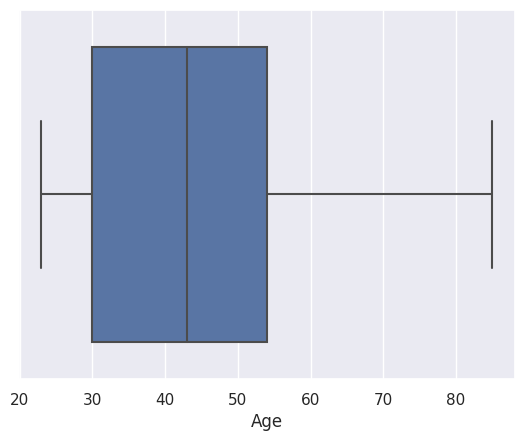

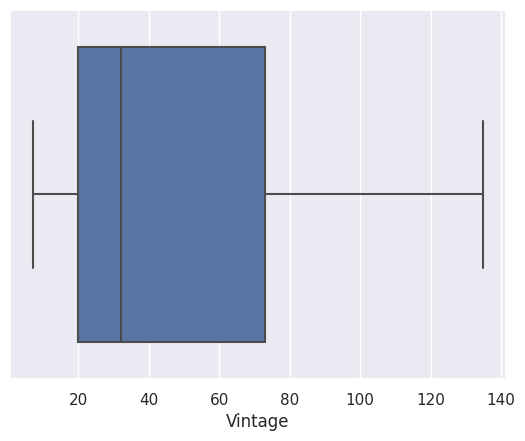

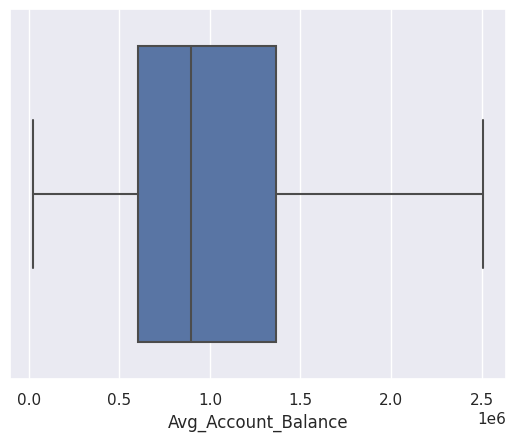

In [15]:
for i in data[['Age', 'Vintage', 'Avg_Account_Balance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [16]:
num = (data.dtypes == 'float')
numerical_cols = list(num[num].index)

numerical_cols

['Age', 'Vintage', 'Avg_Account_Balance']

In [17]:
numeric_vars = ['Age', 'Vintage', 'Avg_Account_Balance']

for var in numeric_vars:
    ranges = [-np.inf, data[var].quantile(0.25), data[var].quantile(0.5), data[var].quantile(0.75), np.inf] 
    data['category'] = pd.cut(data[var], bins=ranges)
    
    grouped = data.groupby(['category', 'Is_interested'])['Is_interested'].count().unstack().reset_index()
    

    grouped['positive_prop'] = grouped[0] / grouped[0].sum()
    grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
    grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
    data = data.merge(grouped[['category',var+'_woe']], how='left', on='category')
    data.drop('category', axis=1, inplace=True)
    data.drop(var, axis=1, inplace=True)

In [18]:
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)

categorical_cols

['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [19]:
string_vars = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

for var in string_vars:
    grouped = data.groupby([var, 'Is_interested'])['Is_interested'].count().unstack().reset_index()

    grouped['positive_prop'] = grouped[0] / grouped[0].sum()
    grouped['negative_prop'] = grouped[1] / grouped[1].sum()

    grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

    grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
    data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)
    data.drop(var, axis=1, inplace=True)

In [20]:
data.columns

Index(['Is_interested', 'Age_woe', 'Vintage_woe', 'Avg_Account_Balance_woe',
       'Gender_woe', 'Occupation_woe', 'Channel_Code_woe',
       'Credit_Product_woe', 'Is_Active_woe'],
      dtype='object')

In [21]:
inputs = data[['Age_woe', 'Vintage_woe', 'Avg_Account_Balance_woe',
       'Gender_woe', 'Occupation_woe', 'Channel_Code_woe',
       'Credit_Product_woe', 'Is_Active_woe']]
output = data['Is_interested']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [77]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report
sns.set()

In [78]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print('Model Performance')
    print('Accuracy is', accuracy)
    
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    
    
    sensitivity = []
    specificity = []
    accuracy = []
    for i in range(len(cm)):
        tp = cm[i,i]
        fn = sum(cm[i,:]) - tp
        fp = sum(cm[:,i]) - tp
        tn = sum(sum(cm)) - tp - fn - fp
        
        sensitivity.append(tp/(tp+fn))
        specificity.append(tn/(tn+fp))
        accuracy.append((tp+tn)/(tp+tn+fp+fn))
        print(f"\nClass {i} -- Sensitivity: {sensitivity[i]:.2f}, Specificity: {specificity[i]:.2f}, Accuracy: {accuracy[i]:.2f}")
    
    overall_accuracy = sum([cm[i, i] for i in range(len(cm))]) / sum(sum(cm))
    print(f"\nOverall Accuracy: {overall_accuracy:.2f}")
    
    overall_sensitivity = sum(sensitivity) / len(sensitivity)
    print(f"Overall Sensitivity: {overall_sensitivity:.2f}")
    
    overall_specificity = sum(specificity) / len(specificity)
    print(f"Overall Specificity: {overall_specificity:.2f}")
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    return accuracy


In [24]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
pip install lgb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement lgb (from versions: none)
ERROR: No matching distribution found for lgb


In [26]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

In [28]:
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)

LGBMClassifier()

In [29]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
cb_clf = cb.CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.092792
0:	learn: 0.6425870	total: 90.8ms	remaining: 1m 30s
1:	learn: 0.6035086	total: 127ms	remaining: 1m 3s
2:	learn: 0.5735827	total: 165ms	remaining: 54.8s
3:	learn: 0.5499273	total: 204ms	remaining: 50.7s
4:	learn: 0.5313623	total: 237ms	remaining: 47.2s
5:	learn: 0.5160174	total: 275ms	remaining: 45.5s
6:	learn: 0.5041923	total: 314ms	remaining: 44.5s
7:	learn: 0.4948001	total: 348ms	remaining: 43.2s
8:	learn: 0.4867023	total: 383ms	remaining: 42.2s
9:	learn: 0.4803279	total: 422ms	remaining: 41.8s
10:	learn: 0.4746616	total: 472ms	remaining: 42.4s
11:	learn: 0.4707197	total: 506ms	remaining: 41.7s
12:	learn: 0.4671365	total: 541ms	remaining: 41.1s
13:	learn: 0.4645415	total: 578ms	remaining: 40.7s
14:	learn: 0.4625265	total: 613ms	remaining: 40.3s
15:	learn: 0.4607423	total: 655ms	remaining: 40.3s
16:	learn: 0.4589354	total: 691ms	remaining: 39.9s
17:	learn: 0.4576206	total: 723ms	remaining: 39.4s
18:	learn: 0.4564953	total: 760ms	remaining: 39.2s
19:	learn

In [97]:
models = [(cb_clf,'Catboost'), (xgb_clf,'XGB'), (lgb_clf,'LGB')]
for model in models:
  print("Model name:"+ str(model[1]))
  evaluate(model[0],X_test, y_test)

Model name:Catboost
Model Performance
Accuracy is 78.73653653110502
Confusion Matrix:
[[54594  1666]
 [14009  3449]]

Class 0 -- Sensitivity: 0.97, Specificity: 0.20, Accuracy: 0.79

Class 1 -- Sensitivity: 0.20, Specificity: 0.97, Accuracy: 0.79

Overall Accuracy: 0.79
Overall Sensitivity: 0.58
Overall Specificity: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87     56260
           1       0.67      0.20      0.31     17458

    accuracy                           0.79     73718
   macro avg       0.74      0.58      0.59     73718
weighted avg       0.77      0.79      0.74     73718

Model name:XGB
Model Performance
Accuracy is 78.77587563417347
Confusion Matrix:
[[54484  1776]
 [13870  3588]]

Class 0 -- Sensitivity: 0.97, Specificity: 0.21, Accuracy: 0.79

Class 1 -- Sensitivity: 0.21, Specificity: 0.97, Accuracy: 0.79

Overall Accuracy: 0.79
Overall Sensitivity: 0.59
Overall Specificity: 0.59
Classific

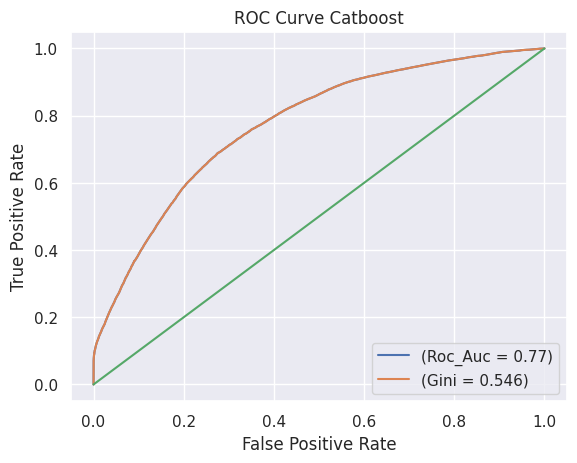

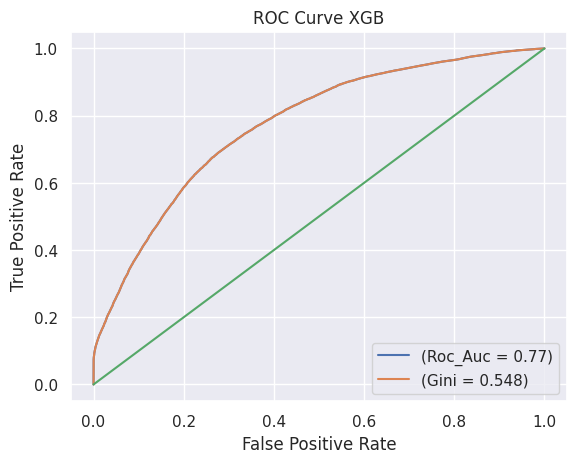

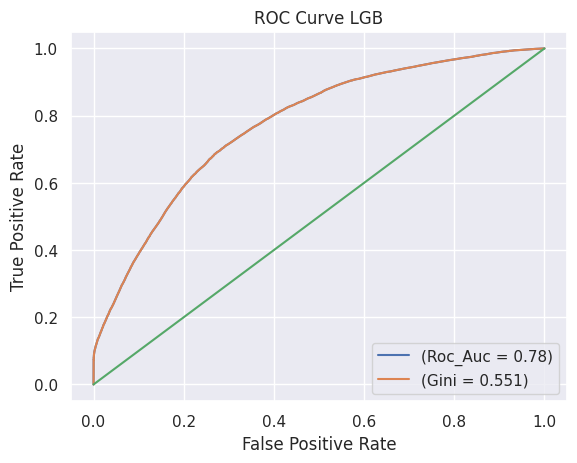

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
models = [(cb_clf,'Catboost'), (xgb_clf,'XGB'), (lgb_clf,'LGB')]
for model in models:
  y_prob = model[0].predict_proba(X_test)[:,1]

  roc_auc = roc_auc_score(y_test, y_prob)
  gini = (2*roc_auc_score(y_test, y_prob))-1

  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  plt.figure()

  plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
  plt.plot(fpr, tpr, label='(Gini = %0.3f)' % gini)
  plt.plot([0, 1], [0, 1])
  plt.xlim()
  plt.ylim()

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve '+str(model[1]))

  plt.legend(loc='lower right')
  plt.show()

In [37]:

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [44]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [48]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [49]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.linspace(0.5, 1, num=6), 
    'colsample_bytree': np.linspace(0.5, 1, num=6), 
    'gamma': [0, 1, 5],
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 9],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [50]:
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [51]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [52]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000], 
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7), 
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [53]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6882316	total: 50.3ms	remaining: 50.2s
1:	learn: 0.6831228	total: 77.4ms	remaining: 38.6s
2:	learn: 0.6782477	total: 104ms	remaining: 34.7s
3:	learn: 0.6731820	total: 132ms	remaining: 32.8s
4:	learn: 0.6685193	total: 158ms	remaining: 31.4s
5:	learn: 0.6637660	total: 184ms	remaining: 30.5s
6:	learn: 0.6592984	total: 212ms	remaining: 30.1s
7:	learn: 0.6547939	total: 242ms	remaining: 30s
8:	learn: 0.6503980	total: 275ms	remaining: 30.3s
9:	learn: 0.6463291	total: 300ms	remaining: 29.7s
10:	learn: 0.6423150	total: 326ms	remaining: 29.3s
11:	learn: 0.6381913	total: 353ms	remaining: 29.1s
12:	learn: 0.6343934	total: 379ms	remaining: 28.8s
13:	learn: 0.6304658	total: 406ms	remaining: 28.6s
14:	learn: 0.6270153	total: 434ms	remaining: 28.5s
15:	learn: 0.6233279	total: 461ms	remaining: 28.4s
16:	learn: 0.6198134	total: 493ms	remaining: 28.5s
17:	learn: 0.6162911	total: 520ms	remaining: 28.4s
18:	learn: 0.6129946	total: 548ms	remaining: 28.3s
19:	learn: 0.6097014	total: 575ms	remaini

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fbdcca902b0>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [54]:
print("Best Hyperparameters for CB: ", random_search_cb.best_params_)

Best Hyperparameters for CB:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [93]:
optimized_model_lgb = random_search_lgb.best_estimator_
optimized_model_xgb = random_search_xgb.best_estimator_
optimized_model_cb = random_search_cb.best_estimator_


In [98]:
models = [(optimized_model_cb,'Optimized Catboost'), (optimized_model_xgb,'Optimized XGB'), (optimized_model_lgb,'Optimized LGB')]

for model in models:
  print("Model name:"+ str(model[1]))
  evaluate(model[0],X_test, y_test)

Model name:Optimized Catboost
Model Performance
Accuracy is 78.59003228519494
Confusion Matrix:
[[55685   575]
 [15208  2250]]

Class 0 -- Sensitivity: 0.99, Specificity: 0.13, Accuracy: 0.79

Class 1 -- Sensitivity: 0.13, Specificity: 0.99, Accuracy: 0.79

Overall Accuracy: 0.79
Overall Sensitivity: 0.56
Overall Specificity: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56260
           1       0.80      0.13      0.22     17458

    accuracy                           0.79     73718
   macro avg       0.79      0.56      0.55     73718
weighted avg       0.79      0.79      0.72     73718

Model name:Optimized XGB
Model Performance
Accuracy is 78.66464092894545
Confusion Matrix:
[[54812  1448]
 [14280  3178]]

Class 0 -- Sensitivity: 0.97, Specificity: 0.18, Accuracy: 0.79

Class 1 -- Sensitivity: 0.18, Specificity: 0.97, Accuracy: 0.79

Overall Accuracy: 0.79
Overall Sensitivity: 0.58
Overall Specifi

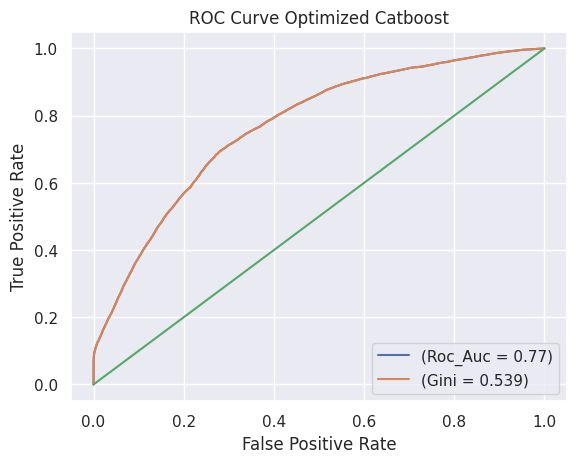

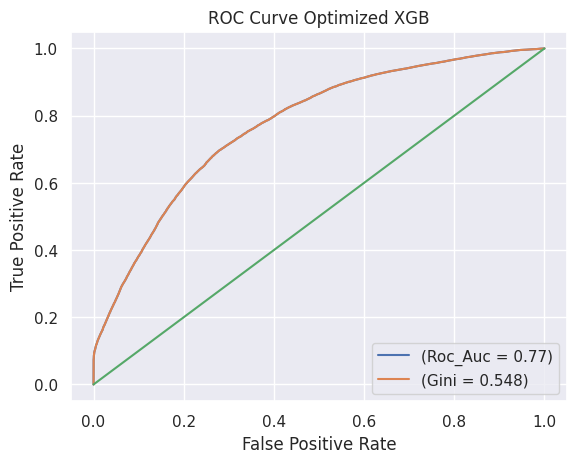

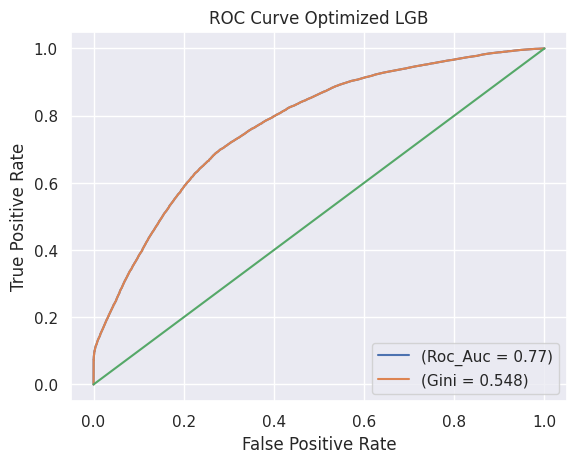

In [99]:
models = [(optimized_model_cb,'Optimized Catboost'), (optimized_model_xgb,'Optimized XGB'), (optimized_model_lgb,'Optimized LGB')]
for model in models:
  y_prob = model[0].predict_proba(X_test)[:,1]

  roc_auc = roc_auc_score(y_test, y_prob)
  gini = (2*roc_auc_score(y_test, y_prob))-1

  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  plt.figure()

  plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
  plt.plot(fpr, tpr, label='(Gini = %0.3f)' % gini)
  plt.plot([0, 1], [0, 1])
  plt.xlim()
  plt.ylim()

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve '+str(model[1]))

  plt.legend(loc='lower right')
  plt.show()

In [61]:
pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier
from xgboost import  XGBClassifier
from catboost import CatBoostClassifier

In [63]:
base_classifiers = [
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
]

In [64]:
meta_classifier = RandomForestClassifier()

In [65]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [66]:
stacking_classifier.fit(X_train, y_train)

Fitting 3 classifiers...
Fitting classifier1: xgbclassifier (1/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: lgbmclassifier (2/3)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 0.5394390	total: 160ms	remaining: 31.8s
5:	learn: 0.5238327	total: 190ms	remaining: 31.4s
6:	learn: 0.5114878	total: 219ms	remaining: 31.1s
7:	learn: 0.5014817	total: 248ms	remaining: 30.7s
8:	learn: 0.4931960	total: 276ms	remaining: 30.4s
9:	learn: 0.4860736	total: 319ms	remaining: 31.6s
10:	learn: 0.4796958	total: 361ms	remaining: 32.5s
11:	learn: 0.4757392	total: 383ms	remaining: 31.5s
12:	learn: 0.4714983	total: 412ms	remaining: 31.3s
13:	learn: 0.4680912	total: 440ms	remaining: 31s
14:	learn: 0.4654075	total: 470ms	remaining: 30.9s
15:	learn: 0.4629856	total: 499ms	remaining: 30.7s
16:	learn: 0.4612290	total: 532ms	remaining: 30.8s
17:	learn: 0.4596296	total: 562ms	remaining: 30.7s
18:	learn: 0.4582535	total: 592ms	remaining: 30.6s
19:	learn: 0.4571481	total: 622ms	remaining: 30.5s
20:	learn: 0.4559398	total: 668ms	remaining: 31.1s
21:	learn: 0.4551411	total: 696ms	remaining: 31s
22:	learn: 0.4541636	tot

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished


Learning rate set to 0.092792
0:	learn: 0.6425870	total: 39ms	remaining: 39s
1:	learn: 0.6035086	total: 72.7ms	remaining: 36.3s
2:	learn: 0.5735827	total: 107ms	remaining: 35.5s
3:	learn: 0.5499273	total: 141ms	remaining: 35.2s
4:	learn: 0.5313623	total: 176ms	remaining: 34.9s
5:	learn: 0.5160174	total: 220ms	remaining: 36.5s
6:	learn: 0.5041923	total: 256ms	remaining: 36.3s
7:	learn: 0.4948001	total: 292ms	remaining: 36.3s
8:	learn: 0.4867023	total: 328ms	remaining: 36.1s
9:	learn: 0.4803279	total: 362ms	remaining: 35.8s
10:	learn: 0.4746616	total: 398ms	remaining: 35.8s
11:	learn: 0.4707197	total: 440ms	remaining: 36.2s
12:	learn: 0.4671365	total: 484ms	remaining: 36.7s
13:	learn: 0.4645415	total: 518ms	remaining: 36.5s
14:	learn: 0.4625265	total: 552ms	remaining: 36.2s
15:	learn: 0.4607423	total: 589ms	remaining: 36.2s
16:	learn: 0.4589354	total: 628ms	remaining: 36.3s
17:	learn: 0.4576206	total: 686ms	remaining: 37.4s
18:	learn: 0.4564953	total: 722ms	remaining: 37.3s
19:	learn: 0.

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                                  LGBMClassifier(),
                                  <catboost.core.CatBoostClassifier object at 0x7fbdcad30880>],
                     cv=5, meta_classifier=RandomForestClassifier(),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [86]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

Model Performance
Accuracy is 78.49914539189886
Confusion Matrix:
[[54265  1995]
 [13855  3603]]

Class 0 -- Sensitivity: 0.96, Specificity: 0.21, Accuracy: 0.78

Class 1 -- Sensitivity: 0.21, Specificity: 0.96, Accuracy: 0.78

Overall Accuracy: 0.78
Overall Sensitivity: 0.59
Overall Specificity: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     56260
           1       0.64      0.21      0.31     17458

    accuracy                           0.78     73718
   macro avg       0.72      0.59      0.59     73718
weighted avg       0.76      0.78      0.74     73718



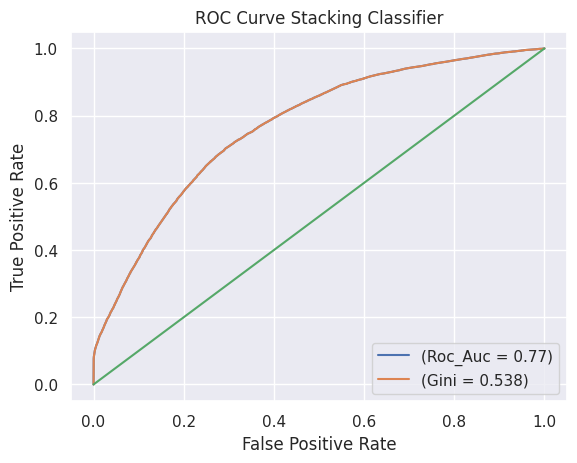

In [68]:

y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.3f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

In [69]:
from google.colab import files 
uploaded = files.upload() 
data_new = pd.read_excel(io.BytesIO(uploaded['test_set_interest.xlsx'])) 
data_new.head()

Saving test_set_interest.xlsx to test_set_interest (2).xlsx


,Age_woe,Vintage_woe,Avg_Account_Balance_woe,Gender_woe,Occupation_woe,Channel_Code_woe,Credit_Product_woe,Is_Active_woe
0,-0.617056,-0.957533,0.271870,-0.148701,-0.203481,-0.450324,-0.390972,-0.238257
1,0.189134,0.576224,-0.213680,-0.148701,0.492647,1.128360,0.187526,-0.238257
2,1.399371,0.639606,0.271870,0.196014,0.492647,1.128360,0.187526,-0.238257
3,1.399371,0.639606,-0.088833,-0.148701,0.492647,1.128360,0.187526,0.168061
4,-0.442434,0.115978,-0.213680,-0.148701,-0.203481,-0.450324,0.187526,-0.238257


In [73]:
prob = lgb_clf.predict_proba(data_new)[:, 1]

In [74]:
prob

array([0.4703106 , 0.08389348, 0.07333294, ..., 0.22962168, 0.09593561,
       0.03475753])

In [75]:
data_new['Is_interested_prob']=prob

In [76]:
data_new

,Age_woe,Vintage_woe,Avg_Account_Balance_woe,Gender_woe,Occupation_woe,Channel_Code_woe,Credit_Product_woe,Is_Active_woe,Is_interested_prob
0,-0.617056,-0.957533,0.271870,-0.148701,-0.203481,-0.450324,-0.390972,-0.238257,0.470311
1,0.189134,0.576224,-0.213680,-0.148701,0.492647,1.128360,0.187526,-0.238257,0.083893
2,1.399371,0.639606,0.271870,0.196014,0.492647,1.128360,0.187526,-0.238257,0.073333
3,1.399371,0.639606,-0.088833,-0.148701,0.492647,1.128360,0.187526,0.168061,0.075910
4,-0.442434,0.115978,-0.213680,-0.148701,-0.203481,-0.450324,0.187526,-0.238257,0.169229
...,...,...,...,...,...,...,...,...,...
49140,1.399371,0.639606,-0.088833,0.196014,0.492647,-0.623044,-0.390972,0.168061,0.140546
49141,-0.617056,0.576224,0.065182,0.196014,-0.203481,1.128360,0.187526,0.168061,0.109249
49142,-0.617056,0.115978,0.065182,0.196014,-0.203481,-0.623044,0.187526,0.168061,0.229622
49143,1.399371,0.576224,-0.213680,0.196014,0.492647,1.128360,-0.390972,0.168061,0.095936
